In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
youtube=pd.read_csv("train.csv")
youtube.head(2)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,NaN,FALSE,FALSE,13342.0,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266.0,TRUE,FALSE,5761.0,3044,False,1487870,NaN,NaN


In [3]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3129 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          2183 non-null   float64
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3197 non-null   float64
 14  dislike                3198 non-null   object 
 15  tag 

# Preprocessing 

##     Part 1 - Handling Missing Value

In [4]:
youtube.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                69
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count            1015
comment_disabled            0
like dislike disabled       0
likes                       1
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

### 1.Column no. 17 and 18 contains only one value. Dropping column 17 and 18 from our dataset.
### 2.Dropping Columns "video id","tags","description" as these columns don't provide any significant information

In [5]:
youtube.drop(youtube.columns[youtube.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
youtube.drop(["Video_id","tags","description"],axis=1,inplace=True)

### 1.Missing values in "category_id" column

In [7]:
youtube["category_id"].value_counts()

24     786
10     415
26     303
25     294
23     283
22     246
17     204
28     186
1      163
27     117
15      74
2       44
20      35
19      31
29       8
43       2
“24      1
Name: category_id, dtype: int64

In [8]:
youtube.loc[1691]

category_id                                                            “24
channel_title                                                          NaN
subscriber                                                       1676098.0
title                    Mark Hamill Didn’t Tell Carrie Fisher the Big ...
Trend_day_count                                                       12.0
Tag_count                                                               12
Trend_tag_count                                                          7
comment_count                                                          NaN
comment_disabled                                                     FALSE
like dislike disabled                                                FALSE
likes                                                              10275.0
dislike                                                               8086
tag appered in title                                                 False
views                    

In [9]:
# Replacing value in a particular cell of row no.1691 with 0
youtube.at[1691,"category_id"]=np.nan

In [10]:
youtube["category_id"].fillna(youtube["category_id"].mode()[0], inplace=True)

### Missing values in "channel title" column
* There are 3 values missing in column "channel title". If channel title is unknown, we cannot place those videos in a particular group( in other words, whose video is this?). 
### Observation:-
### Based on the values present in the column "tags ", we can find the missing channel title value. 


* Replacing missing value in channel title based on the tag.

In [11]:
youtube.at[1691,'channel_title']="The Graham Noton Show"
youtube.at[1783,'channel_title']="Netflix"
youtube.at[1825,'channel_title']="ESPN"

### Count of Before and After replacing missing values
### The Graham Norton Show = 5  ,  The Graham Norton Show =6              
### ESPN    = 23        ,          ESPN    = 24                                                        
### Netflix = 27          ,        Netflix = 28                                                              

## 2.Missing values in subscriber

In [12]:
# Deleting all 23 rows with these null values
youtube.dropna(subset=["subscriber"],how='all',inplace=True)

## 3.Missing values in title

In [13]:
youtube['title'].fillna('Not Given', inplace=True)

## 4.Missing values in Trend_day_count and likes       

In [14]:
# Replacing missing value in a particular cell of row no.1952 with mode
youtube.iat[1952,7]=10

## 5.Missing values in tag_count   

In [15]:
youtube['Tag_count'].fillna("24", inplace=True)

## 6.Missing values in Trend_tag_count   

In [16]:
youtube[youtube["Trend_tag_count"].isnull()]

,category_id,channel_title,subscriber,title,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
71,1,Sara Dietschy,314532.0,Top 10 iPhone Apps for Productivity & Content ...,10.0,20,NaN,213587.0,TRUE,FALSE,8108.0,6282,False,644353


In [17]:
youtube.Trend_tag_count.mode()          

0    6
Name: Trend_tag_count, dtype: object

In [18]:
youtube["Trend_tag_count"].fillna("6", inplace=True)

## 7.Missing values in comment_count   

### Observation:
* several values are missing in this column with respect to other features, therefore dropping this particular row.



In [19]:
youtube.drop(1234 , inplace=True)

In [20]:
youtube[youtube["comment_count"].isnull()]

,category_id,channel_title,subscriber,title,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,6.0,21,6,NaN,FALSE,FALSE,13342.0,6089,False,1978978
6,24,Saturday Night Live,5292034.0,Roy Moore & Jeff Sessions Cold Open - SNL,4.0,17,5,NaN,FALSE,FALSE,9951.0,937,False,1204461
14,15,The king of DIY,725479.0,SHOPPING FOR NEW FISH!!!,9.0,10,2,NaN,FALSE,FALSE,22331.0,14557,True,352657
15,28,BostonDynamics,824219.0,The New SpotMini,5.0,22,4,NaN,FALSE,TRUE,0.0,0,True,271312
16,23,Cracked,2158902.0,One Change That Would Make Pacific Rim a Classic,4.0,17,3,NaN,FALSE,TRUE,0.0,0,True,518595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,17,NBA,8707071.0,Team LeBron! Best Plays from Every All-Star on...,4.0,24,1,NaN,FALSE,TRUE,0.0,0,True,1827626
3191,22,Grace Helbig,3008137.0,My Bachelor Audition Tape // Grace Helbig,6.0,21,6,NaN,FALSE,FALSE,10254.0,8834,False,702498
3193,20,EA SPORTS FIFA,3150213.0,FIFA 18 - FUT Champions Cup Barcelona - Day 1,7.0,20,5,NaN,FALSE,FALSE,9734.0,5912,False,747960
3194,10,JackWhiteVEVO,261596.0,Jack White - Corporation (Audio),7.0,8,6,NaN,FALSE,FALSE,16006.0,12019,True,200410


### Observation:
 * All null values in column"comment count" has a corresponding value "False" in comment disabled column.
   "False" means the comments were disabled and hence no comments were recorded.
 * Therefor, replacing all null values with '0'.
    
    

In [21]:
youtube["comment_count"].fillna('0', inplace=True)

# 8.Missing values in tag appered in title     

In [22]:
youtube.rename(columns = {'tag appered in title':'tag_appered_in_title'}, inplace = True)

In [23]:
youtube[youtube.tag_appered_in_title.isnull()]

,category_id,channel_title,subscriber,title,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag_appered_in_title,views
12,10,marshmello,11146743.0,Marshmello - Blocks (Official Music Video),7.0,22,4,247944.0,TRUE,FALSE,15073.0,13511,NaN,60


In [24]:
youtube["tag_appered_in_title"].fillna(youtube["tag_appered_in_title"].mode()[0], inplace=True)

In [25]:
youtube.isnull().sum()

category_id              0
channel_title            0
subscriber               0
title                    0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag_appered_in_title     0
views                    0
dtype: int64

### All null values have been handled

## Part 2 - Encoding
    * a) Label encoding using cat.codes 
    * b) One Hot Encoder using get_dummies

In [26]:
youtube["comment_disabled"].value_counts()

TRUE     2165
FALSE    1009
Name: comment_disabled, dtype: int64

In [27]:
youtube["comment_disabled"].replace(10,"FALSE", inplace=True)

In [28]:
youtube["comment_disabled"].value_counts()

TRUE     2165
FALSE    1009
Name: comment_disabled, dtype: int64

### One hot encoder on "comment_disabled"

In [29]:
youtube["comment_disabled"]=youtube["comment_disabled"].astype("category")
youtube["comment_disabled"]=youtube["comment_disabled"].cat.codes

In [30]:
youtube = pd.get_dummies(youtube, columns=['comment_disabled'])

In [31]:
youtube.rename(columns={"comment_disabled_1":"comment_enabled"}, inplace=True)

In [32]:
youtube.drop("comment_disabled_0", axis=1, inplace=True)

In [33]:
youtube.head(1)

,category_id,channel_title,subscriber,title,Trend_day_count,Tag_count,Trend_tag_count,comment_count,like dislike disabled,likes,dislike,tag_appered_in_title,views,comment_enabled
0,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,6.0,21,6,0,FALSE,13342.0,6089,False,1978978,0


###  One hot encoder on "like dislike disabled"

In [34]:
youtube.rename(columns = {'like dislike disabled':'like_dislike_disabled'}, inplace = True)

In [35]:
youtube["like_dislike_disabled"]=youtube["like_dislike_disabled"].astype("category")
youtube["like_dislike_disabled"]=youtube["like_dislike_disabled"].cat.codes
youtube = pd.get_dummies(youtube, columns=['like_dislike_disabled'])

In [36]:
youtube.head(2)

,category_id,channel_title,subscriber,title,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,tag_appered_in_title,views,comment_enabled,like_dislike_disabled_0,like_dislike_disabled_1
0,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,6.0,21,6,0,13342.0,6089,False,1978978,0,1,0
1,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,1.0,23,1,116266.0,5761.0,3044,False,1487870,1,1,0


In [37]:
youtube.drop("like_dislike_disabled_0", axis=1, inplace=True)

In [38]:
youtube.rename(columns={"like_dislike_disabled_1":"like_dislike_enabled"}, inplace=True)

In [39]:
youtube.head(1)

,category_id,channel_title,subscriber,title,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,tag_appered_in_title,views,comment_enabled,like_dislike_enabled
0,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,6.0,21,6,0,13342.0,6089,False,1978978,0,0


### One hot encoder on "tag_appered_in_title"

In [40]:
youtube["tag_appered_in_title"].value_counts()

True     2097
False    1077
Name: tag_appered_in_title, dtype: int64

In [41]:
youtube["tag_appered_in_title"]=youtube["tag_appered_in_title"].astype("category")
youtube["tag_appered_in_title"]=youtube["tag_appered_in_title"].cat.codes
youtube = pd.get_dummies(youtube, columns=['tag_appered_in_title'])

In [42]:
youtube.head(1)

,category_id,channel_title,subscriber,title,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views,comment_enabled,like_dislike_enabled,tag_appered_in_title_0,tag_appered_in_title_1
0,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,6.0,21,6,0,13342.0,6089,1978978,0,0,1,0


In [43]:
youtube.drop("tag_appered_in_title_0", axis=1,inplace=True)

In [44]:
youtube.rename(columns={"tag_appered_in_title_1":"tag_appered_in_title"}, inplace=True)

In [45]:
youtube.head(2)

,category_id,channel_title,subscriber,title,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views,comment_enabled,like_dislike_enabled,tag_appered_in_title
0,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,6.0,21,6,0,13342.0,6089,1978978,0,0,0
1,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,1.0,23,1,116266.0,5761.0,3044,1487870,1,0,0


## Part = 3 - Handling Outliers

In [46]:
# checking unique values in all columns
for i in youtube.columns:
    print(youtube[i].value_counts(),"\n")   

24    786
10    413
26    301
25    293
23    281
22    241
17    200
28    186
1     163
27    116
15     74
2      44
20     35
19     31
29      8
43      2
Name: category_id, dtype: int64 

Refinery29                                34
The Tonight Show Starring Jimmy Fallon    33
TheEllenShow                              29
Vox                                       29
Netflix                                   28
                                          ..
BeOurGuest                                 1
BrianJustinCrum                            1
PetaPixel                                  1
Inthefrow                                  1
MN khan                                    1
Name: channel_title, Length: 1485, dtype: int64 

0.0           50
890739.0      34
15769455.0    30
23760020.0    29
3808198.0     29
              ..
603181.0       1
351100.0       1
107.0          1
101448.0       1
28321.0        1
Name: subscriber, Length: 1452, dtype: int64 

Sia - Ho Ho Ho             

In [47]:
#"Trend_tag_count" contains ">" as a value which need to be replaced with a value like mode
youtube["Trend_tag_count"].replace(">","6", inplace=True)

In [48]:
# Converting the "object" data types to numeric
youtube["category_id"]=youtube["category_id"].astype("float64")
youtube["Tag_count"]=youtube["Tag_count"].astype("int64")
youtube["comment_count"]=youtube["comment_count"].astype("float64")
youtube["Trend_tag_count"]=youtube["Trend_tag_count"].astype("int64")
youtube["dislike"]=youtube["dislike"].astype("int64")
youtube["views"]=youtube["views"].astype("int64")

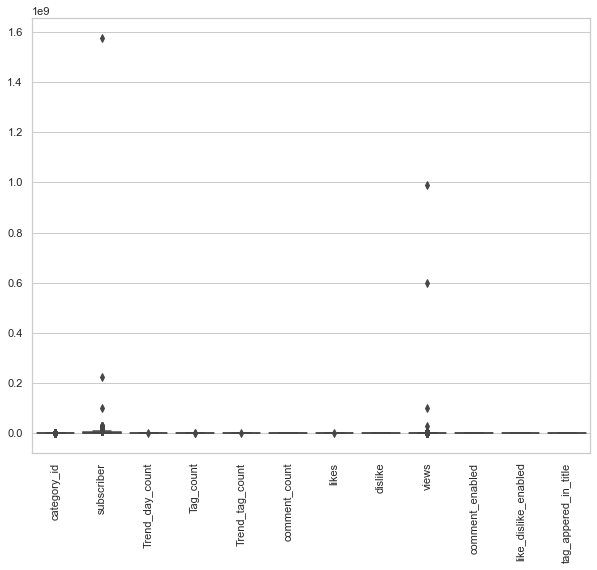

In [49]:
# Plotting boxplot for finding outliers
%matplotlib inline
sns.set(style='whitegrid')
fi,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=youtube)
plt.xticks(rotation ='vertical') 
plt.show()

### Outliers can be observed in columns "subscriber","views" but these values might be   true for those particular videos. Hence, we will proceed with 'Trend_day_count','Tag_count','Trend_tag_count' only

In [50]:
# Finding out the outliers using IQR method and replacing them with null 
for x in ['Trend_day_count','Tag_count','Trend_tag_count']:
    q75,q25 = np.percentile(youtube.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    youtube.loc[youtube[x] < min,x] = np.nan
    youtube.loc[youtube[x] > max,x] = np.nan

In [51]:
youtube.isnull().sum()

category_id             0
channel_title           0
subscriber              0
title                   0
Trend_day_count         1
Tag_count               2
Trend_tag_count         1
comment_count           0
likes                   0
dislike                 0
views                   0
comment_enabled         0
like_dislike_enabled    0
tag_appered_in_title    0
dtype: int64

In [52]:
youtube["Trend_day_count"].fillna(youtube["Trend_day_count"].mode()[0], inplace=True)
youtube["Tag_count"].fillna(youtube["Tag_count"].mode()[0], inplace=True)
youtube["Trend_tag_count"].fillna(youtube["Trend_tag_count"].mode()[0], inplace=True)

# EDA

### Correlation heatmap

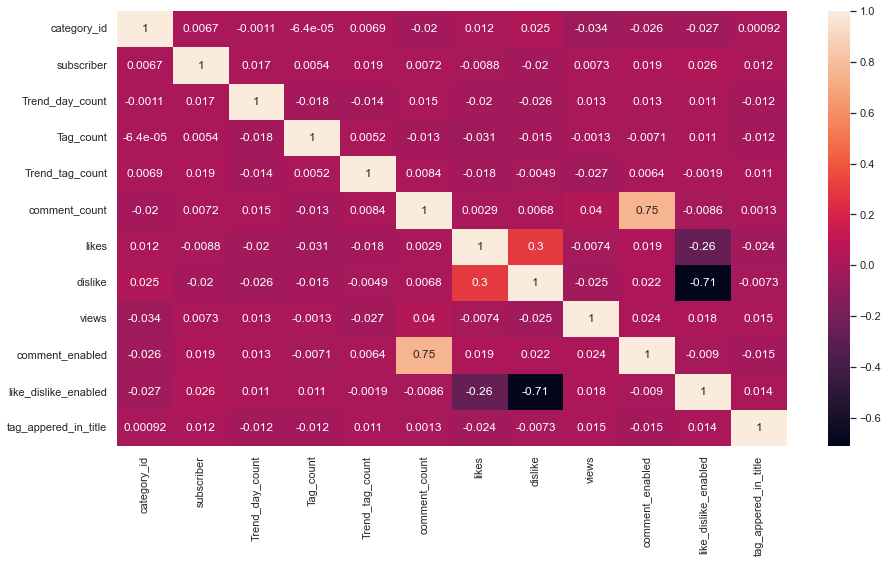

In [53]:
plt.figure(figsize=(15,8))
corr = youtube.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [54]:
# grouping videos on the basis of category_id
lst=[youtube]
for column in lst:
    column.loc[(column['category_id']==1),"category"]="Film & Animation"
    column.loc[(column['category_id']==10),"category"]="Music" 
    column.loc[(column['category_id']==15),"category"]="Pets & Animation"
    column.loc[(column['category_id']==17),"category"]="Sports"
    column.loc[(column['category_id']==18),"category"]="Short Movies"
    column.loc[(column['category_id']==19),"category"]="Travel & Events"
    column.loc[(column['category_id']==2),"category"]="Autos & Vehicles"
    column.loc[(column['category_id']==20),"category"]="Gaming"
    column.loc[(column['category_id']==21),"category"]="Videoblogging" 
    column.loc[(column['category_id']==22),"category"]="People & Blogs"
    column.loc[(column['category_id']==23),"category"]="Comedy" 
    column.loc[(column['category_id']==24),"category"]="Entertainment" 
    column.loc[(column['category_id']==25),"category"]="News & Politics"
    column.loc[(column['category_id']==26),"category"]="Howto & Style"
    column.loc[(column['category_id']==27),"category"]="Education"
    column.loc[(column['category_id']==28),"category"]="Science & Technology"
    column.loc[(column['category_id']==29),"category"]="Nonprofits & Activism"
    column.loc[(column['category_id']==30),"category"]="Movies"
    column.loc[(column['category_id']==31),"category"]="Anime/Animation"
    column.loc[(column['category_id']==32),"category"]="Action/Adventure"
    column.loc[(column['category_id']==33),"category"]="Classics"
    column.loc[(column['category_id']==34),"category"]="Comedy"
    column.loc[(column['category_id']==35),"category"]="Documentary"
    column.loc[(column['category_id']==36),"category"]="Drama"
    column.loc[(column['category_id']==37),"category"]="Family"
    column.loc[(column['category_id']==38),"category"]="Foreign"
    column.loc[(column['category_id']==39),"category"]="Horror"
    column.loc[(column['category_id']==40),"category"]="Sci-Fi/Fantasy"
    column.loc[(column['category_id']==41),"category"]="Thriller"
    column.loc[(column['category_id']==42),"category"]="Shorts"
    column.loc[(column['category_id']==43),"category"]='Shows'
    column.loc[(column['category_id']==44),"category"]='Trailers'

youtube['category'] = youtube['category'].astype("category")

In [55]:
youtube["category"].isnull().any()

False

In [56]:
youtube.drop("category_id", axis=1, inplace=True)

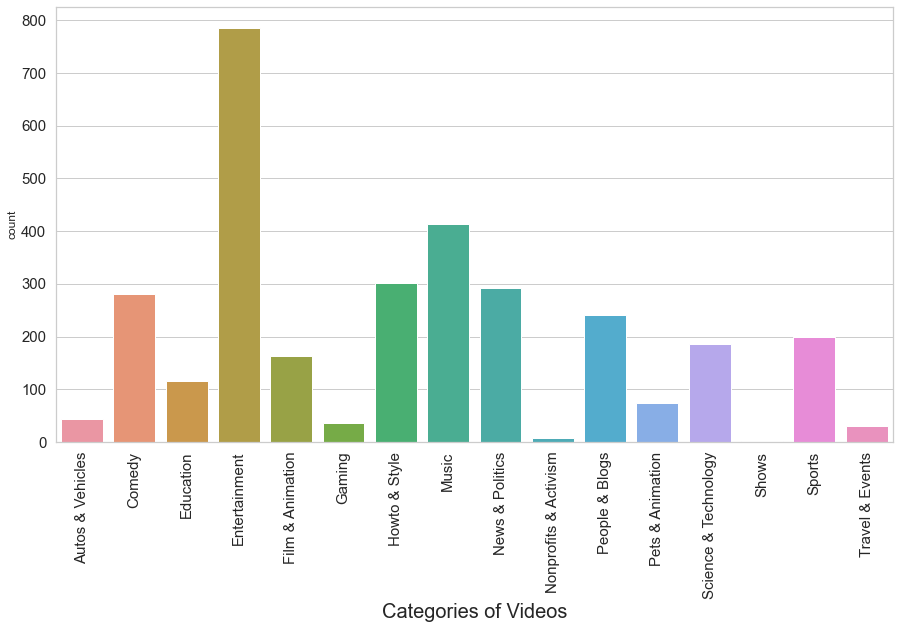

In [57]:
# Plotting different categories 
plt.figure(figsize=(15,8))
sns.countplot(x="category", data=youtube)
plt.xticks(rotation=90, fontsize=15)
plt.yticks( fontsize=15)
plt.xlabel("Categories of Videos", fontsize=20)
plt.show()

### Top 5 categories are :-
    * Entertainment 
    * Music
    * How to and style
    * News & Politics 
    * Comedy

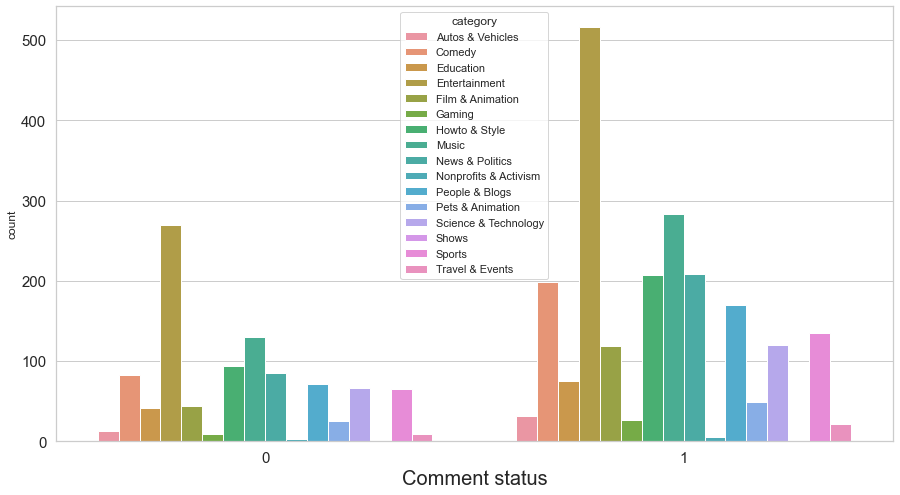

In [58]:
# Plotting categories and comment enabled 
plt.figure(figsize=(15,8))
sns.countplot(x="comment_enabled",hue="category", data=youtube)
plt.xticks(fontsize=15)
plt.yticks( fontsize=15)
plt.xlabel("Comment status", fontsize=20)
plt.show()

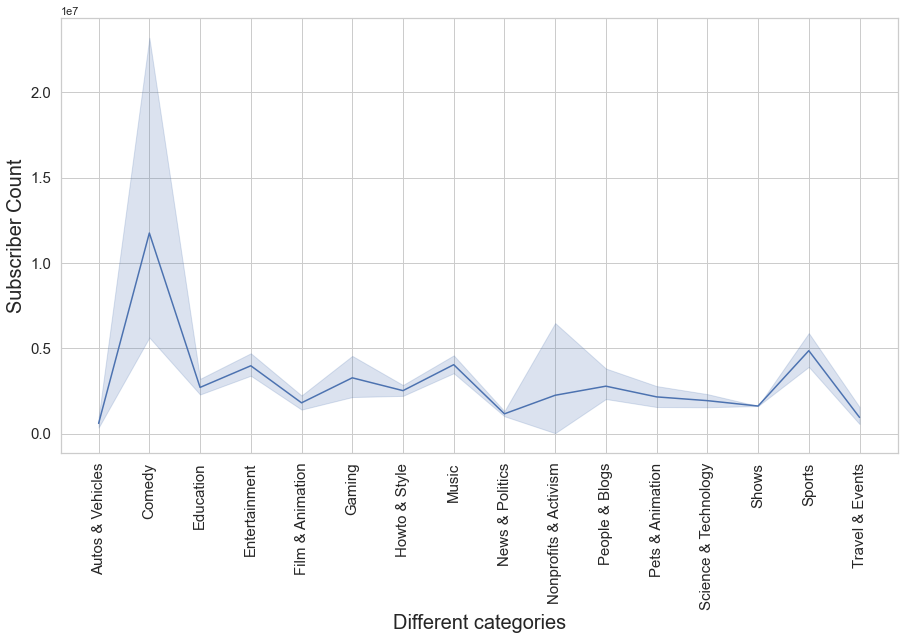

In [59]:
# Plotting categories and comment enabled 
plt.figure(figsize=(15,8))
sns.lineplot(x="category", y="subscriber", data=youtube)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Different categories", fontsize=20)
plt.ylabel("Subscriber Count", fontsize=20)
plt.show()

In [60]:
df = youtube[["channel_title","subscriber"]]

In [61]:
df.shape

(3174, 2)

In [62]:
# Extracting the duplicate values in column "channel title"
df.loc[df.duplicated(), :]

,channel_title,subscriber
208,Jimmy Kimmel Live,11259007.0
209,Screen Junkies,6366779.0
210,The Graham Norton Show,1676098.0
218,ESPN,2702088.0
219,theneedledrop,1329828.0
...,...,...
3189,AmazingPhil,4232293.0
3190,NBA,8707071.0
3191,Grace Helbig,3008137.0
3194,JackWhiteVEVO,261596.0


In [63]:
# Use keep='last' to keep the last occurrence 
df.drop_duplicates(keep='first', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13524\2942124417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


In [64]:
df.shape

(1512, 2)

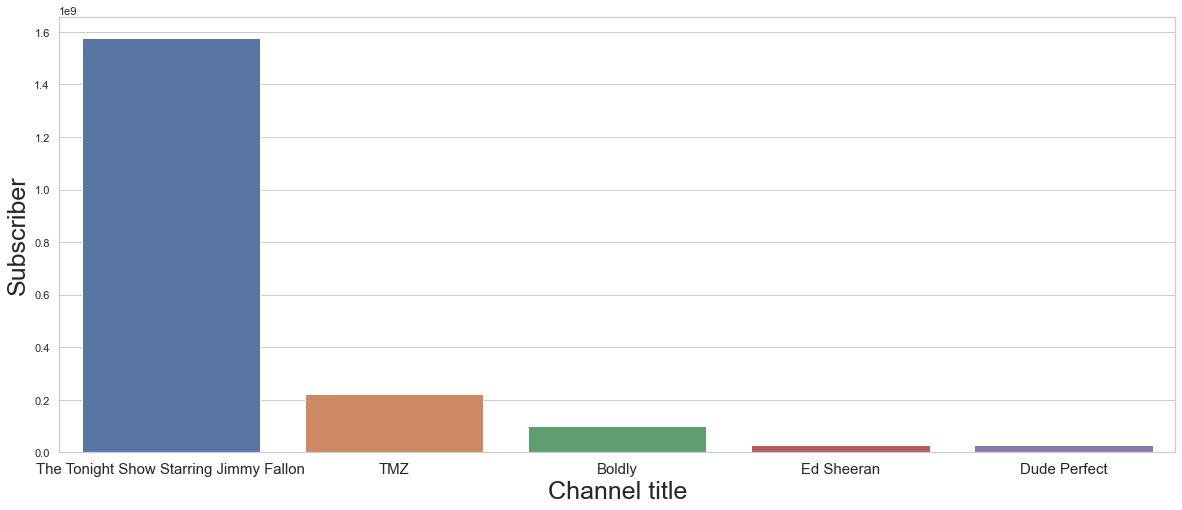

In [65]:
df1 = df.sort_values('subscriber', ascending = False).head(5)
plt.figure(figsize=(20,8))
sns.barplot(x="channel_title", y="subscriber",data=df1)
plt.xticks(fontsize=15)
plt.xlabel("Channel title",fontsize=25)
plt.ylabel("Subscriber",fontsize=25)
plt.show()

### Top 5 Subscribed cahnnels:
    * The Tonight Show Starring Jimmy Fallon
    * TMZ
    * Boldly
    * Ed Sheeran
    * Dude Perfect

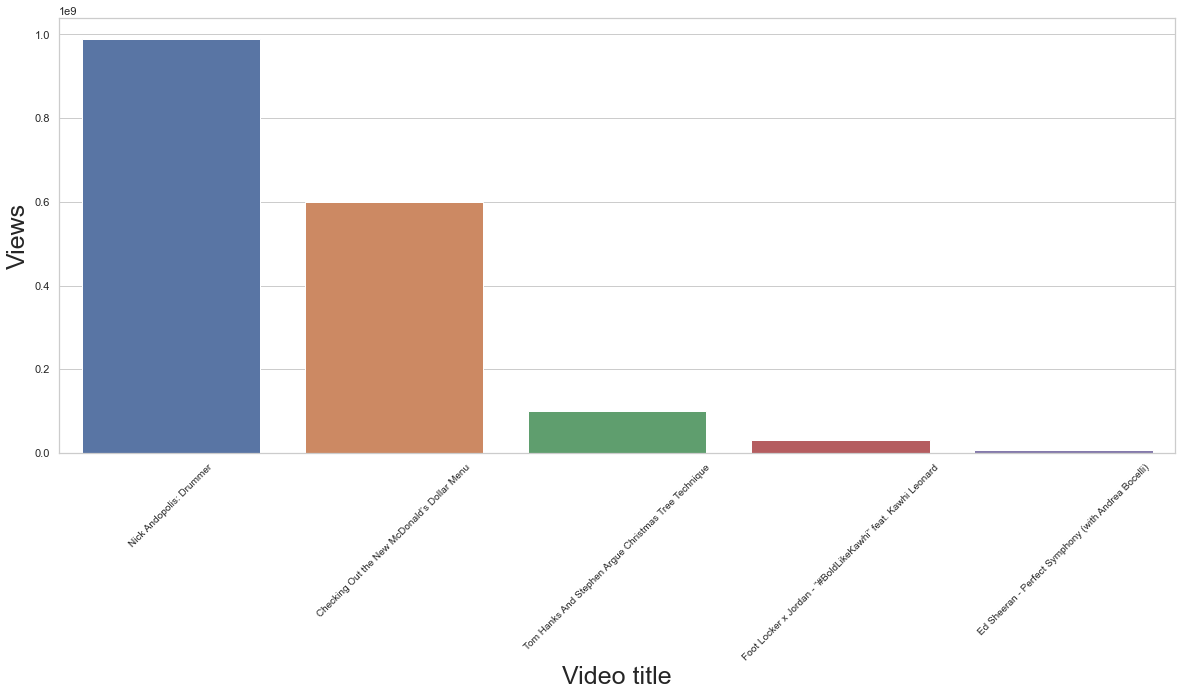

In [66]:
df2 = youtube.sort_values('views', ascending = False).head(5)
plt.figure(figsize=(20,8))
sns.barplot(x="title", y="views",data=df2)
plt.xticks(rotation=45,fontsize=10)
plt.xlabel("Video title",fontsize=25)
plt.ylabel("Views",fontsize=25)
plt.show()

### Top 5 videos in terms of views:-
    * Nick Andopolis: Drummer
    * Checking Out the New McDonaldâ€™s Dollar Menu
    * Tom Hanks And Stephen Argue Christmas Tree Technique
    * Foot Locker x Jordan - â€œ#BoldLikeKawhiâ€ feat. Kawhi Leonard
    * Ed Sheeran - Perfect Symphony (with Andrea Bocelli)

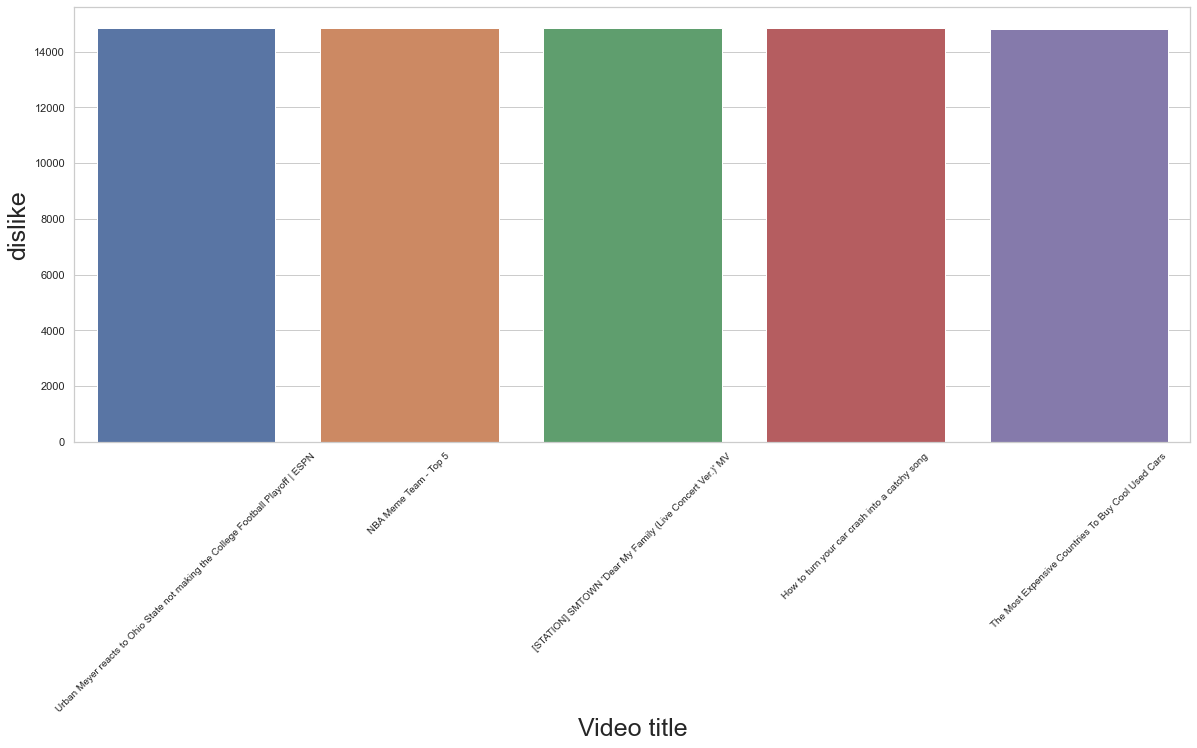

In [67]:
df3 = youtube.sort_values('dislike', ascending = False).head(5)
plt.figure(figsize=(20,8))
sns.barplot(x="title", y="dislike",data=df3)
plt.xticks(rotation=45,fontsize=10)
plt.xlabel("Video title",fontsize=25)
plt.ylabel("dislike",fontsize=25)
plt.show()

### Top 5 videos with highest dislikes:-
    * Urban Meyer reacts to Ohio State not making the College Football Playoff | ESPN
    * NBA Meme Team - Top 5
    * [STATION] SMTOWN 'Dear My Family (Live Concert Ver.)' MV
    * How to turn your car crash into a catchy song
    * The Most Expensive Countries To Buy Cool Used Cars

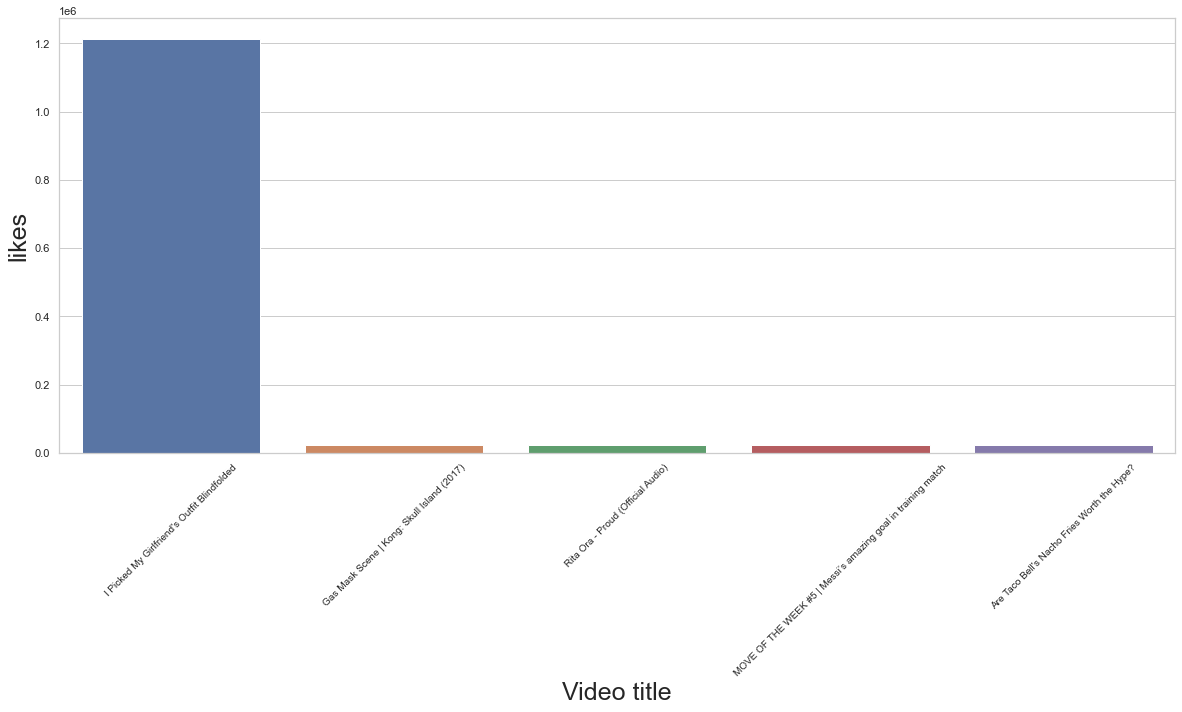

In [68]:
df4 = youtube.sort_values('likes', ascending = False).head(5)
plt.figure(figsize=(20,8))
sns.barplot(x="title", y="likes",data=df4)
plt.xticks(rotation=45,fontsize=10)
plt.xlabel("Video title",fontsize=25)
plt.ylabel("likes",fontsize=25)
plt.show()

### Top 5 videos with highest likes:-
    * I Picked My Girlfriend's Outfit Blindfolded
    * Gas Mask Scene | Kong: Skull Island (2017)
    * Rita Ora - Proud (Official Audio)
    * MOVE OF THE WEEK #5 | Messiâ€™s amazing goal in training match
    * Are Taco Bell's Nacho Fries Worth the Hype?